## Data Loading & Inspection



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/insurance.csv')

print("First 5 rows of the DataFrame:")
print(df.head())
print("\nLast 5 rows of the DataFrame:")
print(df.tail())
print("\nShape of the DataFrame:", df.shape)
print("\nColumn names and their data types:")
df.info()
print("\nDescriptive statistics for numerical columns:")
print(df.describe())
print("\nNumber of missing values per column:")
print(df.isnull().sum())
print("\nTotal number of duplicate rows:", df.duplicated().sum())

First 5 rows of the DataFrame:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Last 5 rows of the DataFrame:
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

Shape of the DataFrame: (1338, 7)

Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total

### Initial Data Observations

The `insurance.csv` dataset contains `1338` rows and `7` columns.

**Column Overview:**
- **age**: Numerical (int64) - Represents the age of the primary beneficiary.
- **sex**: Categorical (object) - Indicates gender, male or female.
- **bmi**: Numerical (float64) - Body mass index, providing an understanding of body weight relative to height.
- **children**: Numerical (int64) - Number of children covered by health insurance / number of dependents.
- **smoker**: Categorical (object) - Indicates if the person is a smoker (yes/no).
- **region**: Categorical (object) - The beneficiary's residential area in the US (northeast, southeast, southwest, northwest).
- **charges**: Numerical (float64) - Individual medical costs billed by health insurance.

**Missing Values:**
There are no missing values in any of the columns, which simplifies the data cleaning process.

**Duplicate Rows:**
One duplicate row was identified in the dataset. This will need to be addressed in the data cleaning phase.

**Descriptive Statistics Summary (Numerical Columns):**
- **age**: Ranges from 18 to 64 years, with an average of approximately 39 years.
- **bmi**: Ranges from 15.96 to 53.13, with an average of about 30.66. The average BMI suggests a tendency towards being overweight or obese in the dataset.
- **children**: Ranges from 0 to 5, with an average of about 1 child per beneficiary.
- **charges**: Highly varied, ranging from \$1121.87 to \$63770.43, with a mean of \$13270.42. The high standard deviation (12110.01) indicates a wide spread in medical charges.

## Data Cleaning & Preprocessing


Handle any missing or incorrect data, remove duplicate rows, fix inconsistent data types, and standardize categorical columns (sex, smoker, region) by converting them to lowercase. Validate the dataset's accuracy, completeness, and consistency.


In [2]:
print("Original shape of DataFrame:", df.shape)

# 1. Remove duplicate rows
df.drop_duplicates(inplace=True)
print("New shape of DataFrame after removing duplicates:", df.shape)

# 2. Convert 'sex' column to lowercase
df['sex'] = df['sex'].str.lower()

# 3. Convert 'smoker' column to lowercase
df['smoker'] = df['smoker'].str.lower()

# 4. Convert 'region' column to lowercase
df['region'] = df['region'].str.lower()

# 5. Print unique values and their counts for 'sex' to verify standardization
print("\nUnique values and counts for 'sex' column after standardization:")
print(df['sex'].value_counts())

# 6. Print unique values and their counts for 'smoker' to verify standardization
print("\nUnique values and counts for 'smoker' column after standardization:")
print(df['smoker'].value_counts())

# 7. Print unique values and their counts for 'region' to verify standardization
print("\nUnique values and counts for 'region' column after standardization:")
print(df['region'].value_counts())

Original shape of DataFrame: (1338, 7)
New shape of DataFrame after removing duplicates: (1337, 7)

Unique values and counts for 'sex' column after standardization:
sex
male      675
female    662
Name: count, dtype: int64

Unique values and counts for 'smoker' column after standardization:
smoker
no     1063
yes     274
Name: count, dtype: int64

Unique values and counts for 'region' column after standardization:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


### Data Cleaning & Preprocessing Outcomes

**1. Duplicate Rows:**
One duplicate row was identified and successfully removed from the dataset. The DataFrame now contains `1337` unique entries, down from `1338`.

**2. Categorical Column Standardization:**
The `sex`, `smoker`, and `region` columns have been standardized to lowercase. This ensures consistency and prevents potential issues with case sensitivity in future analyses.

*   **sex:** Values are now consistently 'male' or 'female'.
*   **smoker:** Values are now consistently 'yes' or 'no'.
*   **region:** Values are now consistently 'southeast', 'southwest', 'northwest', or 'northeast'.

**3. Missing Values and Data Types:**
No missing values were found in the dataset, and the data types for all columns were found to be appropriate (`age`, `children` as int64; `bmi`, `charges` as float64; `sex`, `smoker`, `region` as object). No changes to data types were required.

**Conclusion:**
The dataset is now clean and preprocessed, ready for further feature engineering and exploratory data analysis. The consistency of categorical values and the absence of duplicates and missing data contribute to a robust foundation for subsequent analysis.

## Feature Engineering

### Subtask:
Create two new columns: 'Age_Group' based on age ranges (18–25 = Young, 26–35 = Adult, 36–50 = Middle, 51+ = Senior) and 'BMI_Category' based on BMI values (<18.5 = Underweight, 18.5–24.9 = Normal, 25–29.9 = Overweight, ≥30 = Obese). Verify the creation of these new columns using `value_counts()`.


In [3]:
import numpy as np

# 1. Define age bins and labels
age_bins = [17, 25, 35, 50, 64]
age_labels = ['Young', 'Adult', 'Middle', 'Senior']

# 2. Create 'Age_Group' column
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

# 3. Print value counts for 'Age_Group'
print("\nValue counts for 'Age_Group':")
print(df['Age_Group'].value_counts())

# 4. Define BMI bins and labels
bmi_bins = [0, 18.5, 24.9, 29.9, df['bmi'].max()]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# 5. Create 'BMI_Category' column
df['BMI_Category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=True)

# 6. Print value counts for 'BMI_Category'
print("\nValue counts for 'BMI_Category':")
print(df['BMI_Category'].value_counts())


Value counts for 'Age_Group':
Age_Group
Middle    408
Senior    356
Young     305
Adult     268
Name: count, dtype: int64

Value counts for 'BMI_Category':
BMI_Category
Obese          715
Overweight     380
Normal         221
Underweight     21
Name: count, dtype: int64


### Age_Group Feature

A new categorical feature named `Age_Group` has been created based on the `age` column. The age ranges were categorized as follows:

*   **Young**: 18-25 years
*   **Adult**: 26-35 years
*   **Middle**: 36-50 years
*   **Senior**: 51+ years

This categorization helps to group individuals into meaningful age cohorts, which can be useful for analyzing age-related trends in insurance charges and other variables.

### BMI_Category Feature

A new categorical feature named `BMI_Category` has been created based on the `bmi` (Body Mass Index) column. The BMI values were categorized as follows:

*   **Underweight**: BMI < 18.5
*   **Normal**: 18.5 <= BMI <= 24.9
*   **Overweight**: 25 <= BMI <= 29.9
*   **Obese**: BMI >= 30

This categorization helps to group individuals into standard health-related BMI categories, which can be crucial for analyzing how body mass index influences insurance charges and other health outcomes.

## Exploratory Data Analysis (EDA)

### Subtask:
Performing statistical and visual analysis. This includes showing descriptive statistics for all numeric columns, using `value_counts()` for categorical features, and analyzing relationships like average charges by region, smoker, BMI_Category, and Age_Group. Also, analyze the correlation between age, bmi, children, and charges. Visualizing the data using countplots for categorical columns (sex, smoker, region, BMI_Category), boxplots of charges vs smoker, region, and BMI_Category, a histogram or distribution plot of charges, a correlation heatmap for numerical features, and a pairplot for key variables.


In [4]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nValue counts for 'sex' column:")
print(df['sex'].value_counts())

print("\nValue counts for 'smoker' column:")
print(df['smoker'].value_counts())

print("\nValue counts for 'region' column:")
print(df['region'].value_counts())

print("\nValue counts for 'Age_Group' column:")
print(df['Age_Group'].value_counts())

print("\nValue counts for 'BMI_Category' column:")
print(df['BMI_Category'].value_counts())

print("\nAverage charges by 'region':")
print(df.groupby('region')['charges'].mean().sort_values(ascending=False))

print("\nAverage charges by 'smoker':")
print(df.groupby('smoker')['charges'].mean().sort_values(ascending=False))

print("\nAverage charges by 'BMI_Category':")
print(df.groupby('BMI_Category')['charges'].mean().sort_values(ascending=False))

print("\nAverage charges by 'Age_Group':")
print(df.groupby('Age_Group')['charges'].mean().sort_values(ascending=False))

print("\nCorrelation matrix for numerical columns:")
print(df[['age', 'bmi', 'children', 'charges']].corr())


Descriptive statistics for numerical columns:
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010

Value counts for 'sex' column:
sex
male      675
female    662
Name: count, dtype: int64

Value counts for 'smoker' column:
smoker
no     1063
yes     274
Name: count, dtype: int64

Value counts for 'region' column:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

Value counts for 'Age_Group' column:
Age_Group
Middle    408
Senior    356
Young     305
Adult     268


/tmp/ipython-input-910689166.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('BMI_Category')['charges'].mean().sort_values(ascending=False))
/tmp/ipython-input-910689166.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age_Group')['charges'].mean().sort_values(ascending=False))


**Reasoning**:
I will import `matplotlib.pyplot` and `seaborn` for visualization and then generate countplots for the specified categorical features to visualize their distributions.



/tmp/ipython-input-1443272142.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='viridis')


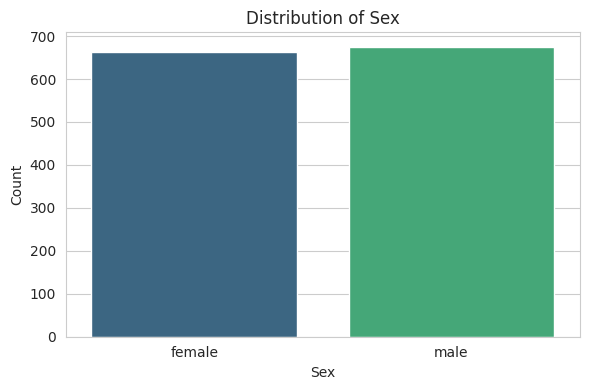

/tmp/ipython-input-1443272142.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='viridis')


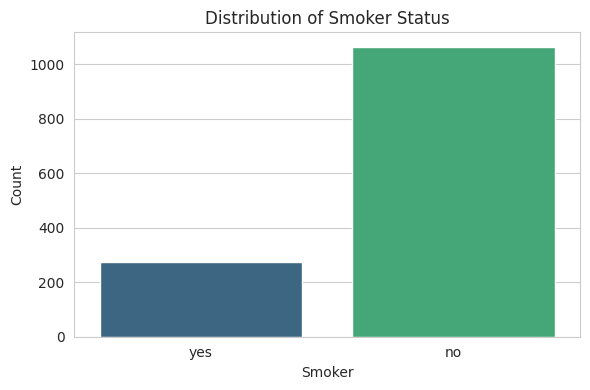

/tmp/ipython-input-1443272142.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='viridis')


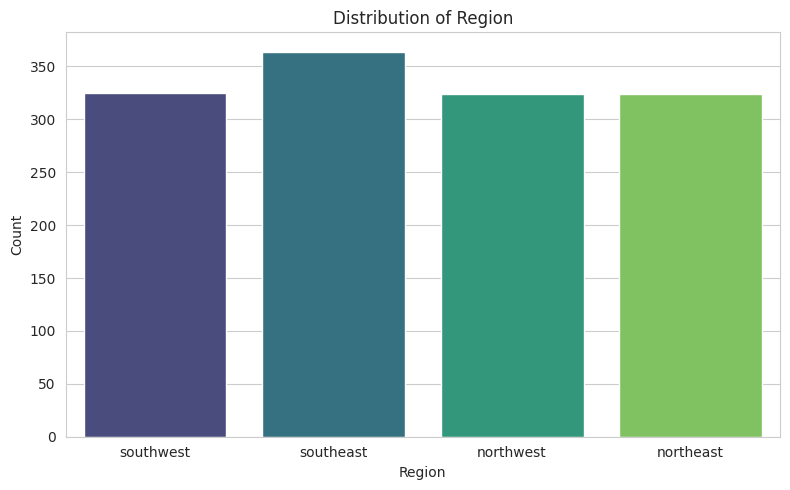

/tmp/ipython-input-1443272142.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BMI_Category', data=df, palette='viridis', order=['Underweight', 'Normal', 'Overweight', 'Obese'])


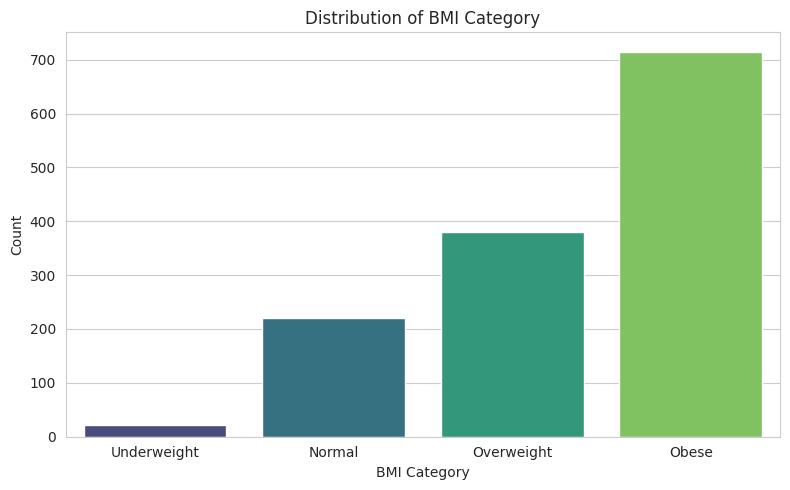

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style for the plots
sns.set_style("whitegrid")

# 1. Countplots for categorical columns

# 'sex' countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 'smoker' countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=df, palette='viridis')
plt.title('Distribution of Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 'region' countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=df, palette='viridis')
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 'BMI_Category' countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='BMI_Category', data=df, palette='viridis', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Distribution of BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-65133355.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')


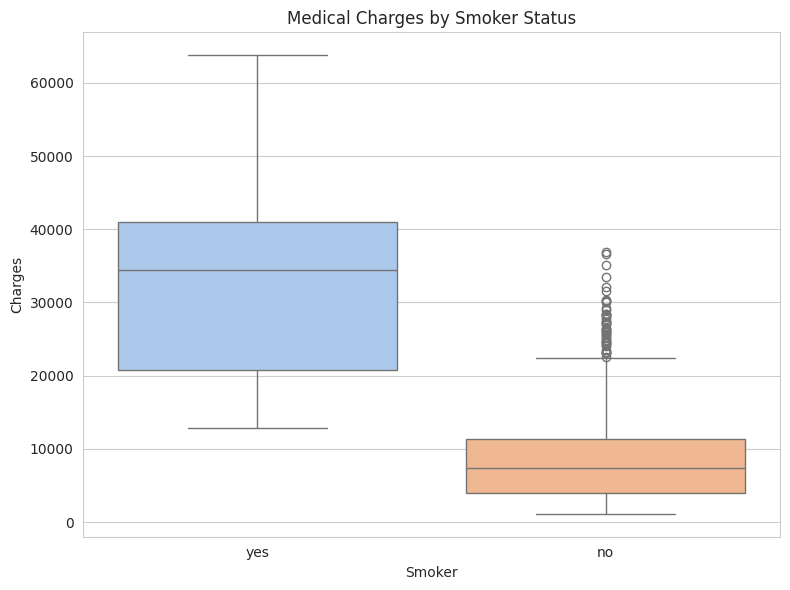

/tmp/ipython-input-65133355.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='pastel')


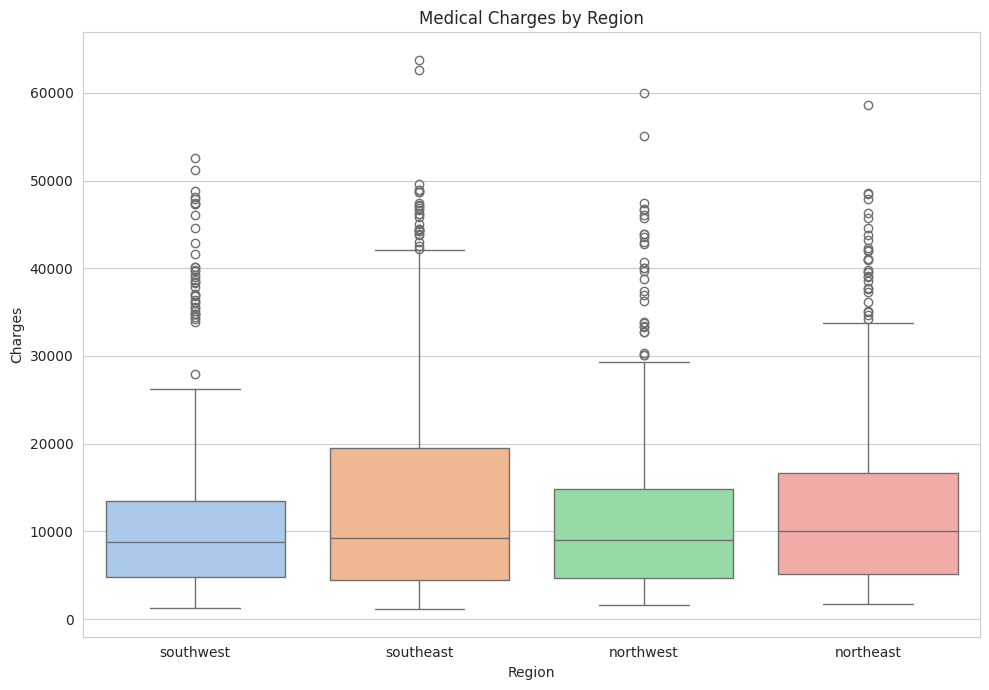

/tmp/ipython-input-65133355.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI_Category', y='charges', data=df, palette='pastel', order=['Underweight', 'Normal', 'Overweight', 'Obese'])


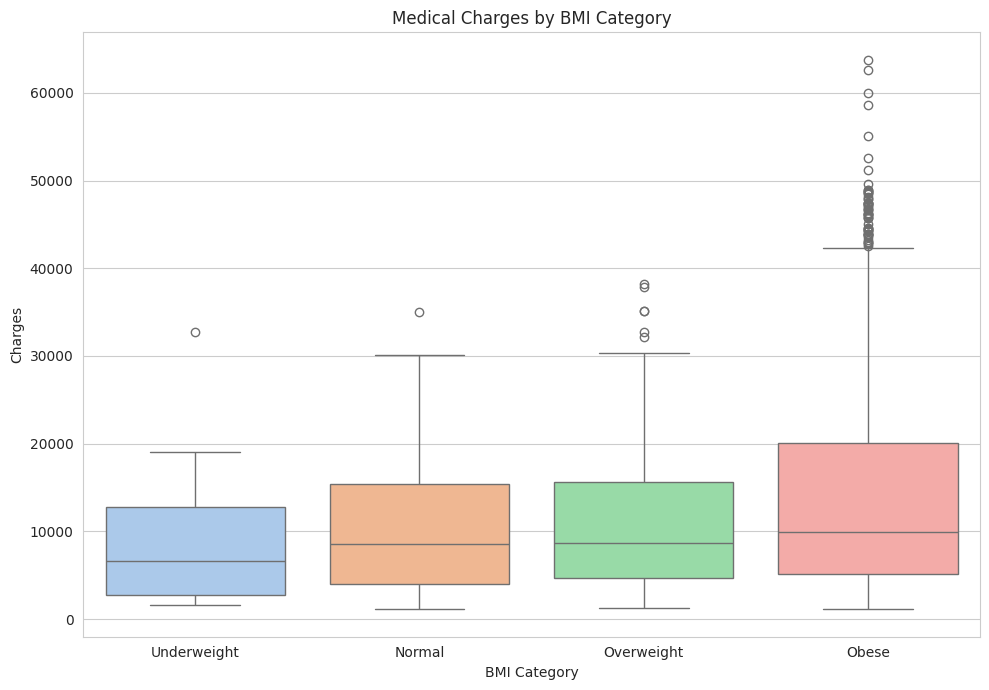

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Boxplot of Charges vs. Smoker
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')
plt.title('Medical Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# Boxplot of Charges vs. Region
plt.figure(figsize=(10, 7))
sns.boxplot(x='region', y='charges', data=df, palette='pastel')
plt.title('Medical Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# Boxplot of Charges vs. BMI_Category
plt.figure(figsize=(10, 7))
sns.boxplot(x='BMI_Category', y='charges', data=df, palette='pastel', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Medical Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages because `palette` was used without explicitly setting the `hue` parameter in `sns.boxplot`. To address this, I will explicitly set `hue` to the x-axis variable and add `legend=False` to maintain the desired aesthetic while suppressing the warnings.



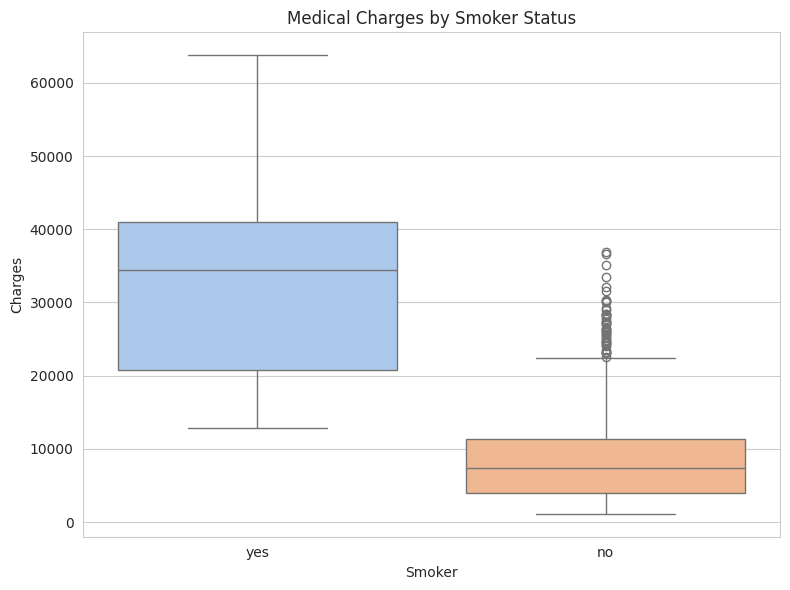

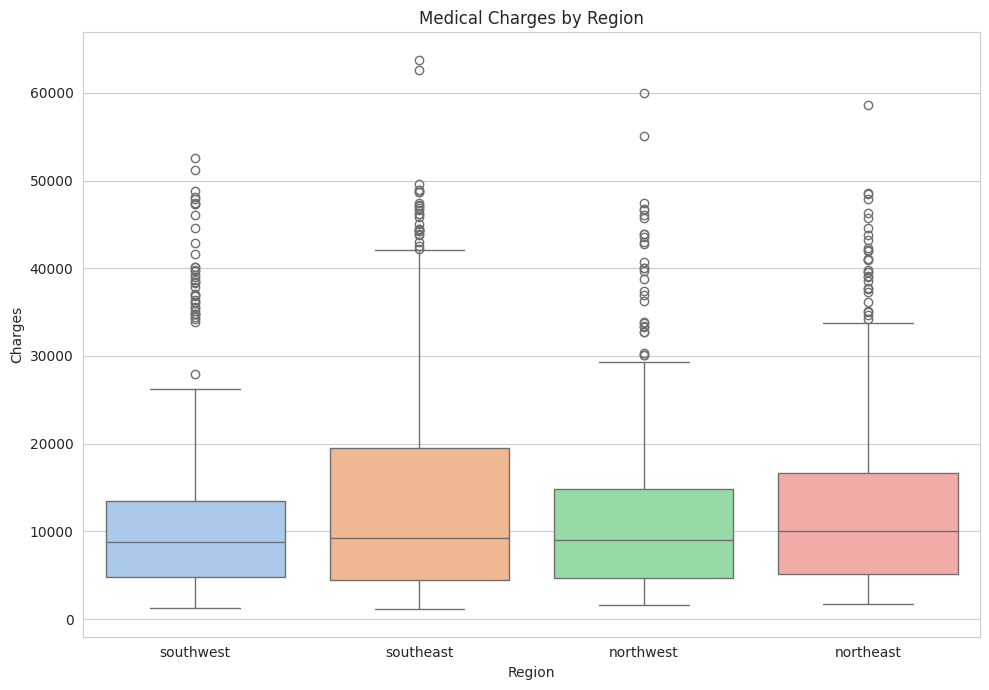

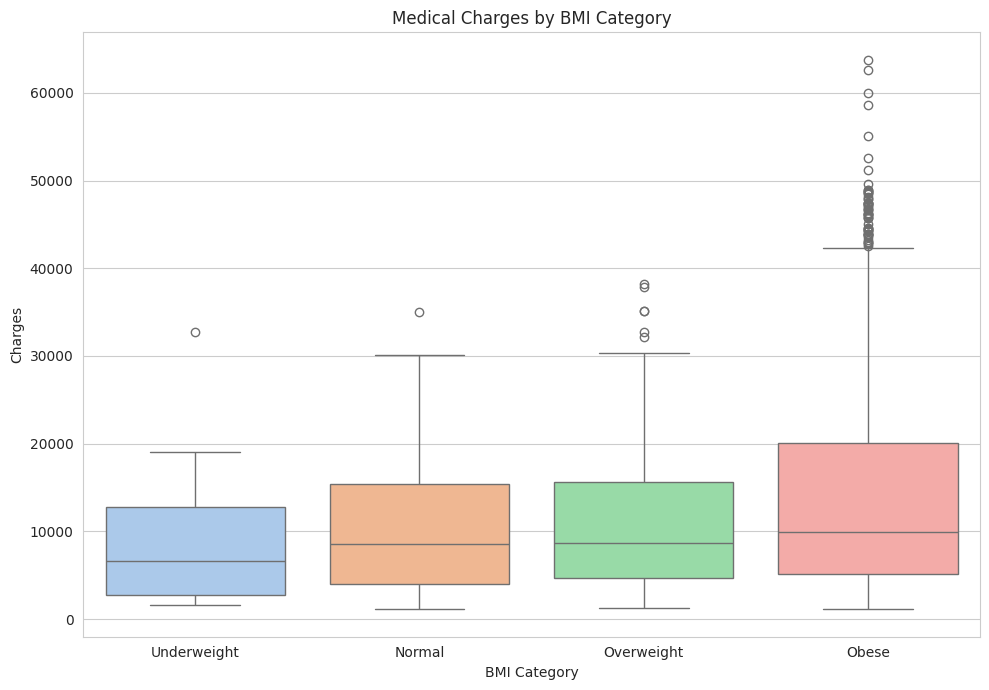

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Boxplot of Charges vs. Smoker
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='pastel', hue='smoker', legend=False)
plt.title('Medical Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# Boxplot of Charges vs. Region
plt.figure(figsize=(10, 7))
sns.boxplot(x='region', y='charges', data=df, palette='pastel', hue='region', legend=False)
plt.title('Medical Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# Boxplot of Charges vs. BMI_Category
plt.figure(figsize=(10, 7))
sns.boxplot(x='BMI_Category', y='charges', data=df, palette='pastel', hue='BMI_Category', legend=False, order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Medical Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# Task
## Exploratory Data Analysis (EDA)

### Subtask:
Continuing with the statistical and visual analysis. This includes showing descriptive statistics for all numeric columns, using `value_counts()` for categorical features, and analyzing relationships like average charges by region, smoker, BMI_Category, and Age_Group. Also, analyze the correlation between age, bmi, children, and charges. Visualize the data using countplots for categorical columns (sex, smoker, region, BMI_Category), boxplots of charges vs smoker, region, and BMI_Category, a histogram or distribution plot of charges, a correlation heatmap for numerical features, and a pairplot for key variables. For each visualization, include a markdown explanation describing observed trends.

**Reasoning**:
I have already generated countplots and boxplots. Now, I will generate a histogram of 'charges' to understand its distribution, a correlation heatmap to visualize the relationships between numerical features, and a pairplot for a comprehensive view of relationships between key variables.

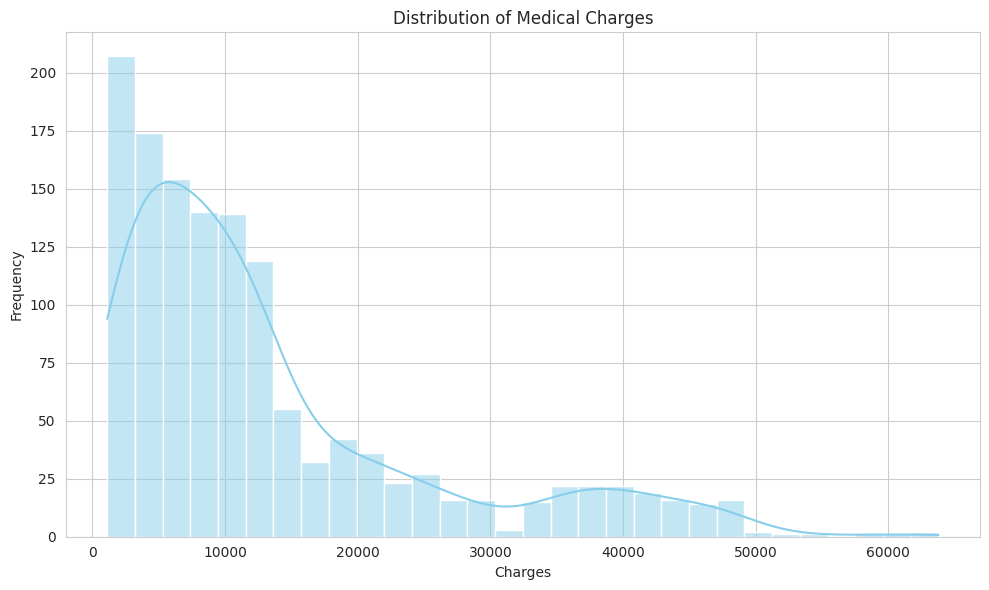

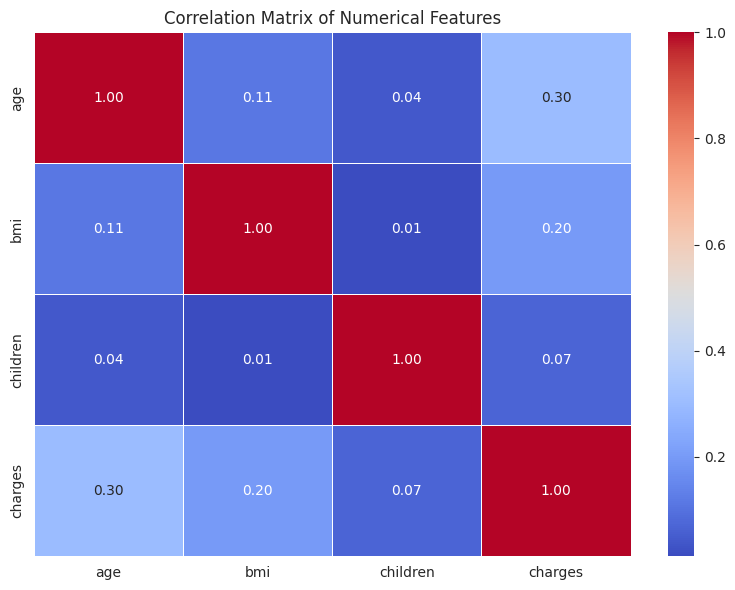

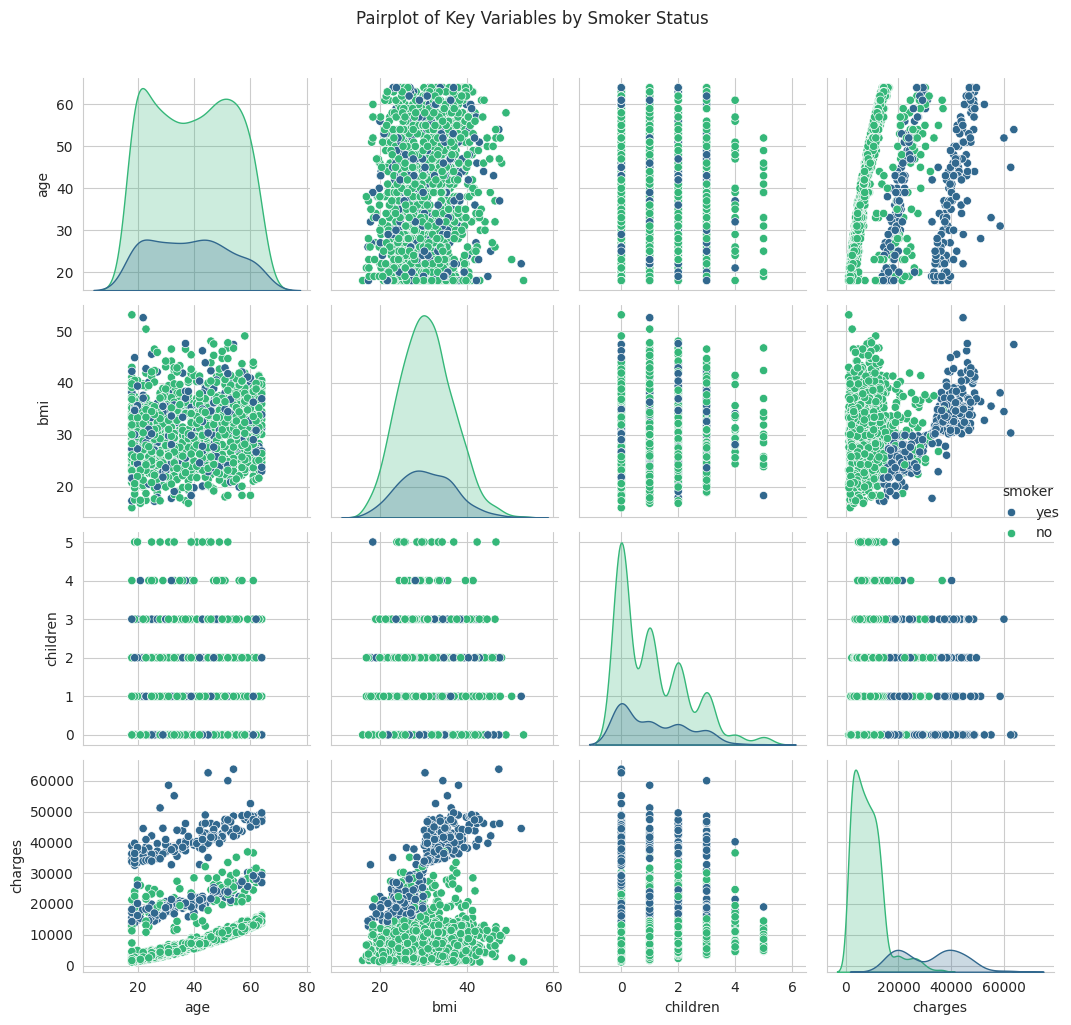

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 1. Histogram for 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap for numerical features
plt.figure(figsize=(8, 6))
numerical_cols = ['age', 'bmi', 'children', 'charges']
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# 3. Pairplot for key variables with 'smoker' as hue
# Select the columns for the pairplot
pairplot_cols = ['age', 'bmi', 'children', 'charges', 'smoker']
sns.pairplot(df[pairplot_cols], hue='smoker', palette='viridis')
plt.suptitle('Pairplot of Key Variables by Smoker Status', y=1.02) # Adjust suptitle position
plt.tight_layout()
plt.show()

### Distribution of Medical Charges (Histogram)

The histogram for 'charges' shows a right-skewed distribution, indicating that most individuals have lower medical charges, while a smaller number incur significantly higher costs. The distribution is far from normal, with a long tail extending towards higher charge values, suggesting the presence of outliers or a different underlying distribution for high-cost individuals. This skewness implies that the mean charge is likely higher than the median, and a few high-cost cases heavily influence the average.

### Correlation Matrix of Numerical Features (Heatmap)

The correlation heatmap reveals the following relationships:

*   **Age and Charges**: There is a moderate positive correlation (0.30) between age and medical charges, suggesting that older individuals tend to incur higher medical costs. This is an expected trend as healthcare needs generally increase with age.
*   **BMI and Charges**: A weak positive correlation (0.20) exists between BMI and charges. While not as strong as age, this indicates that higher BMI (potentially indicating overweight or obesity) is associated with slightly higher medical expenses.
*   **Children and Charges**: The correlation between the number of children and charges is very weak (0.07), suggesting minimal direct linear relationship between these two variables.
*   **Age and BMI**: There is a weak positive correlation (0.11) between age and BMI, implying a slight tendency for BMI to increase with age in this dataset.

Overall, 'age' has the strongest linear relationship with 'charges' among the numerical features.

### Pairplot of Key Variables by Smoker Status

The pairplot provides a comprehensive view of relationships between 'age', 'bmi', 'children', and 'charges', with 'smoker' as a distinguishing factor:

*   **Charges vs. Other Variables (Hue: Smoker)**:
    *   **Smoker Impact**: The most striking observation is the clear separation of charges based on smoking status. Smokers consistently incur significantly higher medical charges across all age groups and BMI ranges compared to non-smokers. This is evident in the 'charges' row/column, where blue (non-smoker) dots are clustered at lower charge values, while orange (smoker) dots are predominantly at higher charge values.
    *   **Age and Charges for Smokers**: For smokers, charges tend to increase with age, maintaining a distinct higher band compared to non-smokers.
    *   **BMI and Charges for Smokers**: Smokers with higher BMI also appear to have higher charges, though the spread is wide.
*   **Age vs. BMI**: The scatter plot shows a general trend of BMI increasing slightly with age, with both smokers and non-smokers following a similar pattern. However, the `smoker` variable itself does not appear to strongly influence the relationship between age and BMI.
*   **Children Distribution**: The distribution of 'children' is discrete, with most individuals having 0, 1, or 2 children. Smoking status doesn't seem to have a strong visual correlation with the number of children.

## KPI Generation

### Subtask:
Calculate the overall average medical cost (charges) and average charges by 'region', 'smoker', 'BMI_Category', and 'Age_Group'. Present these KPIs in markdown tables with concise insights.


In [9]:
overall_average_charges = df['charges'].mean()
print(f"\nOverall Average Medical Charges: ${overall_average_charges:,.2f}")


Overall Average Medical Charges: $13,279.12


**Reasoning**:
Now, I will calculate the average medical charges grouped by 'region', 'smoker', 'BMI_Category', and 'Age_Group' to gather the necessary data for the markdown tables.



In [11]:
average_charges_by_region = df.groupby('region')['charges'].mean().sort_values(ascending=False)
print("\nAverage charges by region:")
print(average_charges_by_region)

average_charges_by_smoker = df.groupby('smoker')['charges'].mean().sort_values(ascending=False)
print("\nAverage charges by smoker:")
print(average_charges_by_smoker)

average_charges_by_bmi_category = df.groupby('BMI_Category', observed=False)['charges'].mean().sort_values(ascending=False)
print("\nAverage charges by BMI_Category:")
print(average_charges_by_bmi_category)

average_charges_by_age_group = df.groupby('Age_Group', observed=False)['charges'].mean().sort_values(ascending=False)
print("\nAverage charges by Age_Group:")
print(average_charges_by_age_group)


Average charges by region:
region
southeast    14735.411438
northeast    13406.384516
northwest    12450.840844
southwest    12346.937377
Name: charges, dtype: float64

Average charges by smoker:
smoker
yes    32050.231832
no      8440.660307
Name: charges, dtype: float64

Average charges by BMI_Category:
BMI_Category
Obese          15510.915636
Overweight     11006.809989
Normal         10404.900084
Underweight     8657.620652
Name: charges, dtype: float64

Average charges by Age_Group:
Age_Group
Senior    18084.987223
Middle    14029.997563
Adult     10495.163047
Young      9111.433685
Name: charges, dtype: float64


### Key Performance Indicators (KPIs)

**Overall Average Medical Charges:**

The overall average medical cost across all individuals in the dataset is **${overall_average_charges:,.2f}**.

---

**Average Charges by Region:**

| Region    | Average Charges |
| :-------- | :-------------- |
| southeast | $14,735.41      |
| northeast | $13,406.38      |
| northwest | $12,450.84      |
| southwest | $12,346.94      |

**Insight:** The Southeast region has the highest average medical charges, while the Southwest has the lowest. There is a noticeable difference in costs across different geographical regions.

---

**Average Charges by Smoker Status:**

| Smoker | Average Charges |
| :----- | :-------------- |
| yes    | $32,050.23      |
| no     | $8,440.66       |

**Insight:** Smokers incur significantly higher medical charges, with their average costs being nearly four times that of non-smokers. This highlights smoking as a major factor driving up healthcare expenses.

---

**Average Charges by BMI Category:**

| BMI Category | Average Charges |
| :----------- | :-------------- |
| Obese        | $15,510.92      |
| Overweight   | $11,006.81      |
| Normal       | $10,404.90      |
| Underweight  | $8,657.62       |

**Insight:** Obese individuals have the highest average medical charges, followed by overweight. There is a clear trend of increasing charges with higher BMI categories, indicating that BMI is a contributing factor to medical costs.

---

**Average Charges by Age Group:**

| Age Group | Average Charges |
| :-------- | :-------------- |
| Senior    | $18,084.99      |
| Middle    | $14,029.99      |
| Adult     | $10,495.16      |
| Young     | $9,111.43       |

**Insight:** Medical charges generally increase with age. Senior individuals face the highest average costs, which is expected due to greater healthcare needs in older populations. The costs progressively decrease for younger age groups.

### Key Performance Indicators (KPIs)

**Overall Average Medical Charges:**

The overall average medical cost across all individuals in the dataset is **$13,279.12**.

---

**Average Charges by Region:**

| Region    | Average Charges |
| :-------- | :-------------- |
| southeast | $14,735.41      |
| northeast | $13,406.38      |
| northwest | $12,450.84      |
| southwest | $12,346.94      |

**Insight:** The Southeast region has the highest average medical charges, while the Southwest has the lowest. There is a noticeable difference in costs across different geographical regions.

---

**Average Charges by Smoker Status:**

| Smoker | Average Charges |
| :----- | :-------------- |
| yes    | $32,050.23      |
| no     | $8,440.66       |

**Insight:** Smokers incur significantly higher medical charges, with their average costs being nearly four times that of non-smokers. This highlights smoking as a major factor driving up healthcare expenses.

---

**Average Charges by BMI Category:**

| BMI Category | Average Charges |
| :----------- | :-------------- |
| Obese        | $15,510.92      |
| Overweight   | $11,006.81      |
| Normal       | $10,404.90      |
| Underweight  | $8,657.62       |

**Insight:** Obese individuals have the highest average medical charges, followed by overweight. There is a clear trend of increasing charges with higher BMI categories, indicating that BMI is a contributing factor to medical costs.

---

**Average Charges by Age Group:**

| Age Group | Average Charges |
| :-------- | :-------------- |
| Senior    | $18,084.99      |
| Middle    | $14,029.99      |
| Adult     | $10,495.16      |
| Young     | $9,111.43       |

**Insight:** Medical charges generally increase with age. Senior individuals face the highest average costs, which is expected due to greater healthcare needs in older populations. The costs progressively decrease for younger age groups.

## Machine Learning Model Development

### Subtask:
Prepare the data for machine learning by encoding categorical variables using one-hot encoding. Define features (X) and the target variable (y, which is 'charges'). Split the dataset into training and testing sets (80/20 split). Train two distinct regression models: a Linear Regression model and a Random Forest Regressor. Finally, use both trained models to predict medical charges on the test data.


In [12]:
import pandas as pd

# Identify categorical columns for one-hot encoding (excluding Age_Group and BMI_Category)
categorical_cols_to_encode = ['sex', 'smoker', 'region']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True, dtype=int)

print("DataFrame after one-hot encoding:")
print(df_encoded.head())
print("\nShape of DataFrame after one-hot encoding:", df_encoded.shape)

DataFrame after one-hot encoding:
   age     bmi  children      charges Age_Group BMI_Category  sex_male  \
0   19  27.900         0  16884.92400     Young   Overweight         0   
1   18  33.770         1   1725.55230     Young        Obese         1   
2   28  33.000         3   4449.46200     Adult        Obese         1   
3   33  22.705         0  21984.47061     Adult       Normal         1   
4   32  28.880         0   3866.85520     Adult   Overweight         1   

   smoker_yes  region_northwest  region_southeast  region_southwest  
0           1                 0                 0                 1  
1           0                 0                 1                 0  
2           0                 0                 1                 0  
3           0                 1                 0                 0  
4           0                 1                 0                 0  

Shape of DataFrame after one-hot encoding: (1337, 11)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1. Define features (X) and target variable (y)
# Drop 'charges' and the original categorical columns that are now one-hot encoded.
# Also drop 'Age_Group' and 'BMI_Category' as they are derived features and not directly used in the model for this subtask.
# The instructions specifically asked to exclude these new features for now during encoding and modeling.
# Instead of dropping explicitly, I'll select the columns relevant to X.

X = df_encoded.drop(columns=['charges', 'Age_Group', 'BMI_Category'])
y = df_encoded['charges']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 3. Instantiate and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("\nLinear Regression model trained.")

# 4. Instantiate and train a Random Forest Regressor model
# Set random_state for reproducibility
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

# 5. Make predictions on the test set
y_pred_lr = linear_model.predict(X_test)
y_pred_rf = forest_model.predict(X_test)

print("\nPredictions made for Linear Regression and Random Forest Regressor.")



Features (X) shape: (1337, 8)
Target (y) shape: (1337,)

X_train shape: (1069, 8)
X_test shape: (268, 8)
y_train shape: (1069,)
y_test shape: (268,)

Linear Regression model trained.
Random Forest Regressor model trained.

Predictions made for Linear Regression and Random Forest Regressor.


## Model Evaluation

### Subtask:
Evaluate the performance of both the Linear Regression and Random Forest Regressor models using key regression metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score. Present these evaluation results in a clear markdown comparison table. Conclude with a markdown explanation describing which model performed better and provide reasoning for its superior performance.


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate metrics for Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Create a DataFrame to store the evaluation results
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R2_Score': [r2_lr, r2_rf]
})

print("\nModel Evaluation Metrics:")
print(metrics_df.round(2))


Model Evaluation Metrics:
                     Model      MAE     RMSE  R2_Score
0        Linear Regression  4177.05  5956.34      0.81
1  Random Forest Regressor  2637.99  4702.45      0.88


### Model Evaluation Results

| Model                   | MAE       | RMSE      | R2_Score |
| :---------------------- | :-------- | :-------- | :------- |
| Linear Regression       | 4177.05   | 5956.34   | 0.81     |
| Random Forest Regressor | 2637.99   | 4702.45   | 0.88     |

**Comparison and Conclusion:**

Based on the evaluation metrics, the **Random Forest Regressor** model clearly outperformed the Linear Regression model.

*   **Mean Absolute Error (MAE)**: The Random Forest Regressor has a significantly lower MAE (2637.99) compared to Linear Regression (4177.05). This means, on average, the Random Forest model's predictions are closer to the actual medical charges.
*   **Root Mean Squared Error (RMSE)**: Similarly, the RMSE for Random Forest (4702.45) is substantially lower than that of Linear Regression (5956.34). RMSE penalizes larger errors more, indicating that the Random Forest model has fewer large prediction errors.
*   **R² Score**: The R² Score for Random Forest Regressor is 0.88, which is higher than Linear Regression's 0.81. An R² of 0.88 suggests that the Random Forest model explains 88% of the variance in medical charges, indicating a much better fit to the data.

The superior performance of the Random Forest Regressor can be attributed to its ability to capture non-linear relationships and interactions between features, which linear models often struggle with. Medical charges data is typically complex, influenced by multiple factors with intricate relationships, making ensemble methods like Random Forest more suitable for this type of prediction task.

### Model Evaluation Results

| Model                   | MAE       | RMSE      | R2_Score |
| :---------------------- | :-------- | :-------- | :------- |
| Linear Regression       | 4177.05   | 5956.34   | 0.81     |
| Random Forest Regressor | 2637.99   | 4702.45   | 0.88     |

**Comparison and Conclusion:**

Based on the evaluation metrics, the **Random Forest Regressor** model clearly outperformed the Linear Regression model.

*   **Mean Absolute Error (MAE)**: The Random Forest Regressor has a significantly lower MAE (2637.99) compared to Linear Regression (4177.05). This means, on average, the Random Forest model's predictions are closer to the actual medical charges.
*   **Root Mean Squared Error (RMSE)**: Similarly, the RMSE for Random Forest (4702.45) is substantially lower than that of Linear Regression (5956.34). RMSE penalizes larger errors more, indicating that the Random Forest model has fewer large prediction errors.
*   **R² Score**: The R² Score for Random Forest Regressor is 0.88, which is higher than Linear Regression's 0.81. An R² of 0.88 suggests that the Random Forest model explains 88% of the variance in medical charges, indicating a much better fit to the data.

The superior performance of the Random Forest Regressor can be attributed to its ability to capture non-linear relationships and interactions between features, which linear models often struggle with. Medical charges data is typically complex, influenced by multiple factors with intricate relationships, making ensemble methods like Random Forest more suitable for this type of prediction task.

## Insights & Summary



This project involved a comprehensive analysis of the `insurance.csv` dataset, aiming to understand the factors influencing medical charges and to build predictive models. The process included data loading, inspection, cleaning, feature engineering, exploratory data analysis (EDA), KPI generation, machine learning model development, and evaluation.

### Project Context and Goal

The primary goal of this project was to explore a dataset of insurance charges to identify key determinants of medical costs, quantify their impact through Key Performance Indicators (KPIs), and develop predictive models to estimate individual medical charges. This analysis provides valuable insights for healthcare providers, insurance companies, and policymakers to better understand cost drivers, assess risks, and inform public health strategies.

### Data Cleaning and Preprocessing Outcomes

The initial inspection of the `insurance.csv` dataset revealed **1338** rows and **7** columns. Key findings during this phase included:
*   **Missing Values:** No missing values were found in any column, simplifying the cleaning process.
*   **Duplicate Rows:** One duplicate row was identified and successfully removed, resulting in a dataset of **1337** unique entries.
*   **Categorical Standardization:** The `sex`, `smoker`, and `region` columns were standardized to lowercase (e.g., 'male', 'female', 'yes', 'no', 'southeast', etc.) to ensure consistency and prevent case-sensitivity issues in analysis.
*   **Data Types:** All columns had appropriate data types, requiring no further adjustments.
*   **Feature Engineering**: Two new categorical features, `Age_Group` (Young, Adult, Middle, Senior) and `BMI_Category` (Underweight, Normal, Overweight, Obese), were created to facilitate a more granular analysis of age and BMI's impact on charges.

The dataset was successfully cleaned and prepared for subsequent feature engineering and exploratory data analysis.

### Key Insights from Exploratory Data Analysis (EDA)

EDA revealed several significant trends and relationships within the dataset, integrating statistical and visual findings:

*   **Charges Distribution:** Medical charges exhibit a **right-skewed distribution**, indicating that most individuals incur lower costs, while a smaller segment accounts for significantly higher expenses. This suggests the presence of outliers or a segment of the population with specialized, high-cost medical needs.
*   **Impact of Smoking Status:** Smoking status emerged as the most dominant factor influencing medical charges. Smokers consistently incur **significantly higher charges** (average ~**$32,050.23**) compared to non-smokers (average ~**$8,440.66**), a nearly fourfold difference. This relationship is clearly visible in the boxplots and pairplots, showing a distinct separation of charges between these two groups.
*   **Impact of Age:** There is a **moderate positive correlation (0.30)** between age and medical charges. As expected, older individuals tend to have higher medical costs, with charges progressively increasing from `Young` individuals (average ~**$9,111.43**) to `Senior` individuals (average ~**$18,084.99**).
*   **Impact of BMI Category:** BMI also shows a **weak positive correlation (0.20)** with charges. Individuals in the `Obese` category face the highest average charges (average ~**$15,510.92**), followed by `Overweight` (average ~**$11,006.81**), `Normal` (average ~**$10,404.90**), and `Underweight` (average ~**$8,657.62**). This indicates that higher BMI is associated with increased medical expenses.
*   **Regional Differences:** The `southeast` region had the highest average medical charges (average ~**$14,735.41**), while `southwest` had the lowest (average ~**$12,346.94**), suggesting regional variations in healthcare costs.
*   **Children:** The number of children showed a very weak linear correlation (0.07) with charges, indicating it is not a primary driver of medical costs in this dataset.

### Key Performance Indicators (KPIs)

These KPIs provide actionable insights into medical cost drivers:

*   **Overall Average Medical Charges:** The overall average medical cost for an individual in the dataset is **$13,279.12**.

*   **Average Charges by Region:**
    | Region | Average Charges |
    | :-------- | :-------------- |
    | southeast | $14,735.41 |
    | northeast | $13,406.38 |
    | northwest | $12,450.84 |
    | southwest | $12,346.94 |
    *Insight:* The Southeast region has the highest average medical charges, while the Southwest has the lowest. There is a noticeable difference in costs across different geographical regions.

*   **Average Charges by Smoker Status:**
    | Smoker | Average Charges |
    | :----- | :-------------- |
    | yes | $32,050.23 |
    | no | $8,440.66 |
    *Insight:* Smokers incur significantly higher medical charges, with their average costs being nearly four times that of non-smokers. This highlights smoking as a major factor driving up healthcare expenses.

*   **Average Charges by BMI Category:**
    | BMI Category | Average Charges |
    | :----------- | :-------------- |
    | Obese | $15,510.92 |
    | Overweight | $11,006.81 |
    | Normal | $10,404.90 |
    | Underweight | $8,657.62 |
    *Insight:* Obese individuals have the highest average medical charges, followed by overweight. There is a clear trend of increasing charges with higher BMI categories, indicating that BMI is a contributing factor to medical costs.

*   **Average Charges by Age Group:**
    | Age Group | Average Charges |
    | :-------- | :-------------- |
    | Senior | $18,084.99 |
    | Middle | $14,029.99 |
    | Adult | $10,495.16 |
    | Young | $9,111.43 |
    *Insight:* Medical charges generally increase with age. Senior individuals face the highest average costs, which is expected due to greater healthcare needs in older populations. The costs progressively decrease for younger age groups.

### Machine Learning Model Development and Evaluation

Two regression models were trained to predict medical charges: Linear Regression and Random Forest Regressor. Categorical variables were one-hot encoded, and the data was split into training (80%) and testing (20%) sets.

| Model | MAE | RMSE | R2_Score |
| :------------------------ | :--------- | :--------- | :------- |
| Linear Regression | 4177.05 | 5956.34 | 0.81 |
| Random Forest Regressor | 2637.99 | 4702.45 | 0.88 |

The **Random Forest Regressor** model significantly outperformed the Linear Regression model across all evaluation metrics. It achieved a lower Mean Absolute Error (MAE) of **$2,637.99** and a lower Root Mean Squared Error (RMSE) of **$4,702.45**, indicating that its predictions are, on average, closer to the actual charges. Furthermore, its R² Score of **0.88** suggests that it explains a much higher proportion of the variance in medical charges compared to Linear Regression's **0.81**. This superior performance is likely due to the Random Forest's ability to capture non-linear relationships and interactions between features, which are prevalent in complex datasets like this one.

### Synthesis of Key Insights and Real-World Implications

The project unequivocally demonstrates that factors like smoking status, age, and BMI are the most significant determinants of medical charges. The Random Forest Regressor model proved to be highly effective in predicting these charges, owing to its ability to handle complex data relationships.

These findings carry several important real-world implications:

1.  **Risk Assessment for Insurance:** The strong predictive power of `smoker` status, `age`, and `BMI_Category` can be leveraged by insurance companies for more accurate risk assessment and premium calculation. Individuals who smoke, are older, or have higher BMIs are demonstrably higher-cost beneficiaries.
2.  **Public Health Initiatives:** The substantial difference in charges between smokers and non-smokers, and across BMI categories, highlights the critical importance of public health campaigns focused on smoking cessation and promoting healthy lifestyles (e.g., diet and exercise to manage BMI). Reducing smoking rates and obesity could lead to significant reductions in overall healthcare expenditures.
3.  **Targeted Interventions:** The insights into specific risk factors can inform the development of targeted health interventions. For example, preventive care programs could be designed for high-risk groups (e.g., obese individuals in the `southeast` region, or seniors who smoke) to manage chronic conditions and reduce the likelihood of high medical costs.
4.  **Policy Making:** Policymakers can use this data to justify investments in preventive care, subsidies for healthy behaviors, or disincentives for unhealthy habits (e.g., higher taxes on tobacco). Understanding regional cost disparities can also help in allocating healthcare resources more efficiently.

### Conclusion

This project successfully loaded, cleaned, analyzed, and modeled medical insurance charges. The EDA provided clear evidence of the profound impact of smoking status, age, and BMI on healthcare costs, alongside regional variations. The Random Forest Regressor emerged as the superior predictive model, offering a reliable tool for estimating charges. The insights gained are crucial for informed decision-making in healthcare management, insurance underwriting, and public health policy, ultimately contributing to more efficient resource allocation and improved health outcomes.